In [14]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
data= pd.read_csv("hasil_cluster_kmeans.csv")
data.head(10)


,parenteducation,lunch,testpreparation,cluster
0,0.2,1,1,0
1,0.0,0,0,2
2,0.4,0,0,2
3,0.2,1,0,1
4,0.6,1,1,0
5,0.2,1,0,1
6,0.8,1,0,1
7,0.4,1,1,0
8,0.2,1,0,1
9,0.4,0,0,2


In [15]:
#use cfs subset eval
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
X = data.iloc[:,0:6]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

#cfs subset eval tugasnya memberi tahu fitur mana yang paling penting

             Specs       Score
3          cluster  688.330089
2  testpreparation  665.000000
1            lunch  348.000000
0  parenteducation    0.605943


In [16]:
print("Ukuran data: ", data.shape)

Ukuran data:  (1000, 4)


In [17]:
#decision tree
import pickle
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier

#make classification with Decision Tree
X = data.iloc[:, 0:3]
y = data.iloc[:, 3]
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3, random_state=7)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

#get confusion matrix
from sklearn.metrics import confusion_matrix
y_pred = tree.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
#get accuracy precision recall f1-score
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))



[[ 62   0   0   0]
 [  0 130   0   0]
 [  0   0  76   0]
 [  0   0   0  32]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00       130
           2       1.00      1.00      1.00        76
           3       1.00      1.00      1.00        32

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



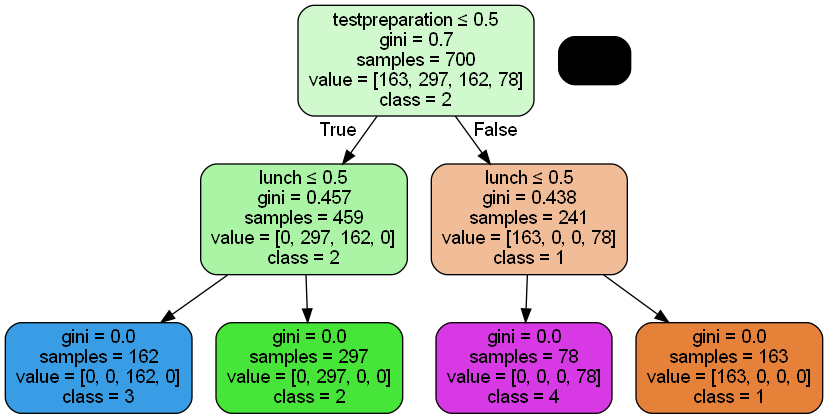

In [18]:
#print tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data, filled=True, rounded=True, special_characters=True, feature_names = X.columns, class_names=['1','2','3','4'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [19]:
#save the model to disk
filename = 'student_tree.pkl'
pickle.dump(tree, open(filename, 'wb'))